downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count1.jpg


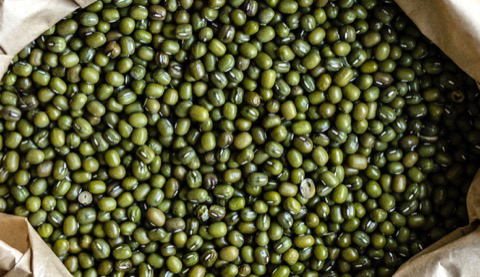

In [244]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count1.jpg"
img = url_to_image(url)
cv2_imshow(img)

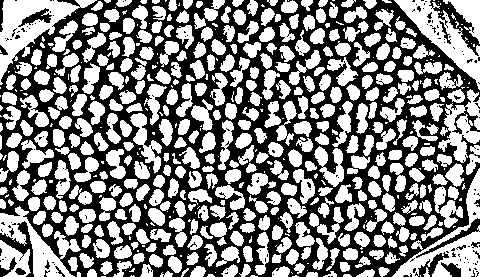

In [245]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, 
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY, 29, 5)
cv2_imshow(thresh)

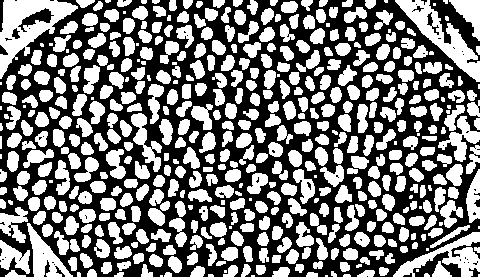

In [246]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)
cv2_imshow(opening)

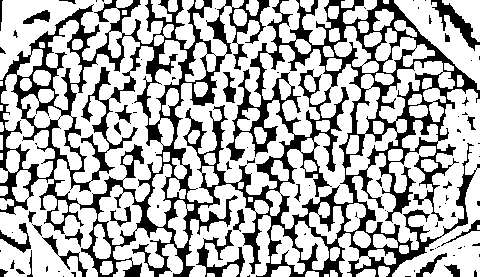

In [247]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)
cv2_imshow(sure_bg)

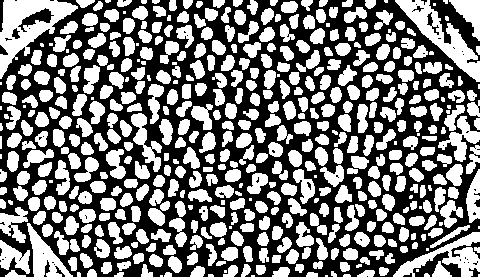

In [248]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.0007*dist_transform.max(), 255, 0)
cv2_imshow(sure_fg)

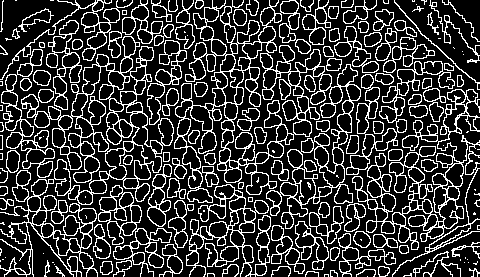

In [249]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
cv2_imshow(unknown)

In [0]:
# Marker labelling
ret, markers = cv2.connectedComponents(opening)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

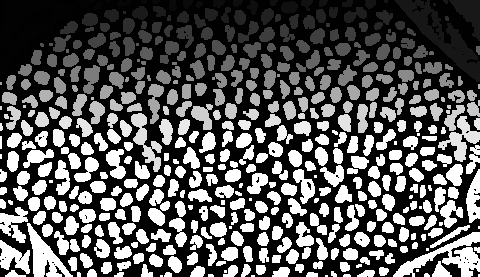

In [251]:
cv2_imshow(markers)

In [0]:
markers = cv2.watershed(img,markers)

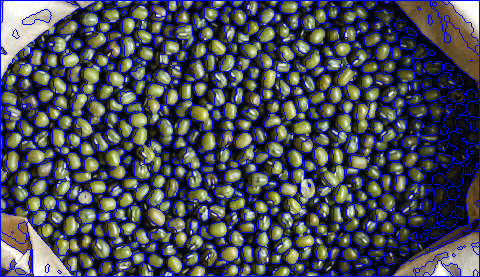

In [253]:
img[markers == -1] = [255,0,0]
cv2_imshow(img)

In [254]:
markers.shape

(277, 480)

Estimated count of the objects

In [255]:
ret

512

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count2.jpg


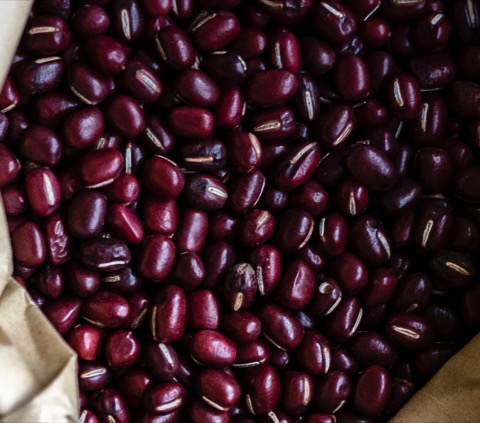

In [256]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count2.jpg"
img = url_to_image(url)
cv2_imshow(img)

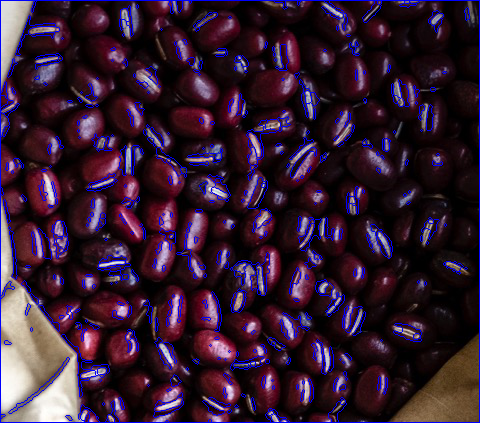

68


In [257]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, 
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY, 13, 10)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations = 1)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.0007*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(opening)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
cv2_imshow(img)
print(ret)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count3.jpg


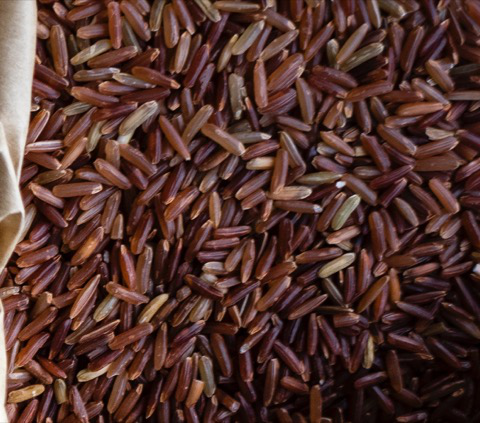

In [258]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count3.jpg"
img = url_to_image(url)
cv2_imshow(img)

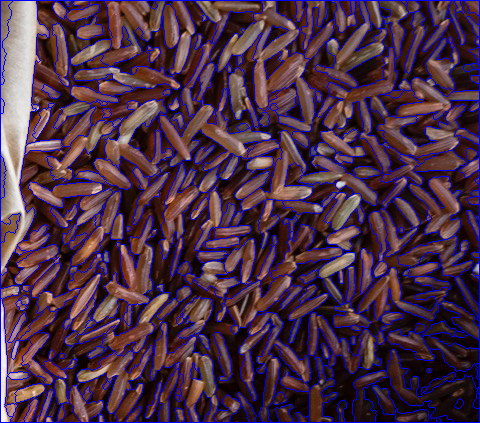

264


In [259]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, 
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY, 109, 4)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations = 1)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.0007*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(opening)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img_markers = img.copy()
img_markers[markers == -1] = [255,0,0]
cv2_imshow(img_markers)
print(ret)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count4.jpg


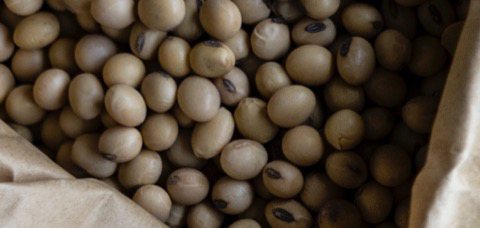

In [260]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count4.jpg"
img = url_to_image(url)
cv2_imshow(img)

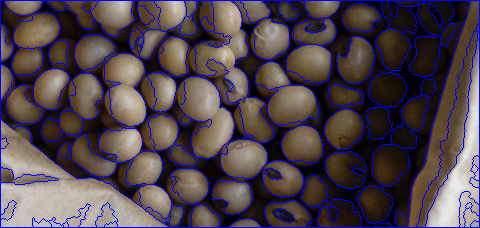

93


In [261]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, 
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY, 53, 2)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations = 1)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.0007*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(opening)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img_markers = img.copy()
img_markers[markers == -1] = [255,0,0]
cv2_imshow(img_markers)
print(ret)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count5.jpg


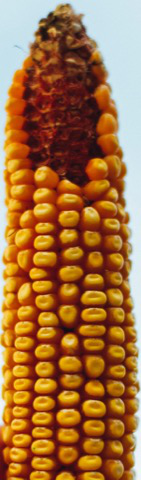

In [262]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count5.jpg"
img = url_to_image(url)
cv2_imshow(img)

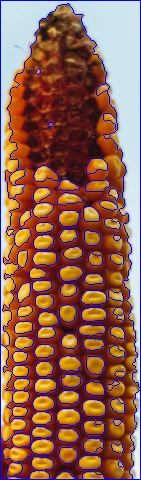

99


In [263]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, 
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY, 235, 1)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations = 1)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.0007*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(opening)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img_markers = img.copy()
img_markers[markers == -1] = [255,0,0]
cv2_imshow(img_markers)
print(ret)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count6.jpg


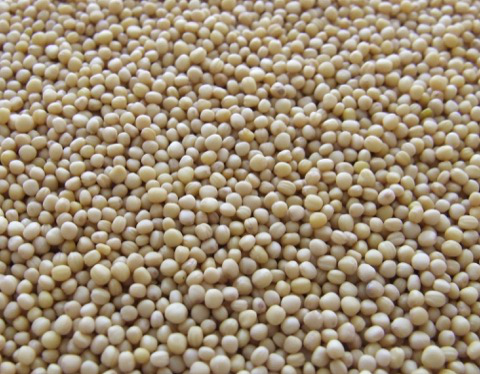

In [264]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count6.jpg"
img = url_to_image(url)
cv2_imshow(img)

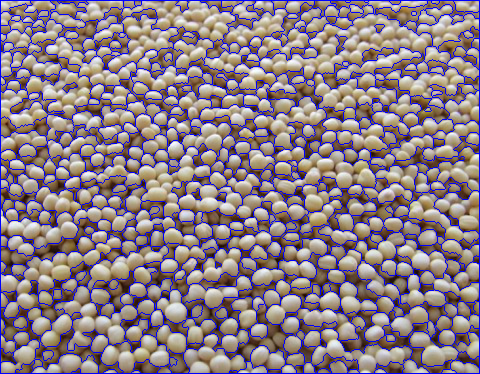

392


In [265]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, 
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY, 203, 1)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations = 1)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.0007*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(opening)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img_markers = img.copy()
img_markers[markers == -1] = [255,0,0]
cv2_imshow(img_markers)
print(ret)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count7.jpg


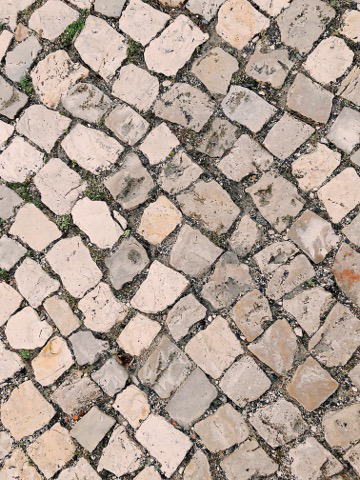

In [266]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count7.jpg"
img = url_to_image(url)
cv2_imshow(img)

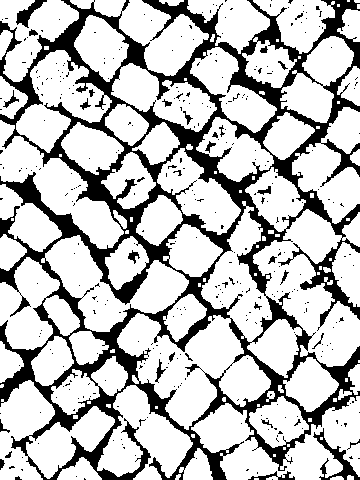

In [267]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, 
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY, 233, 50)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations = 1)
cv2_imshow(opening)

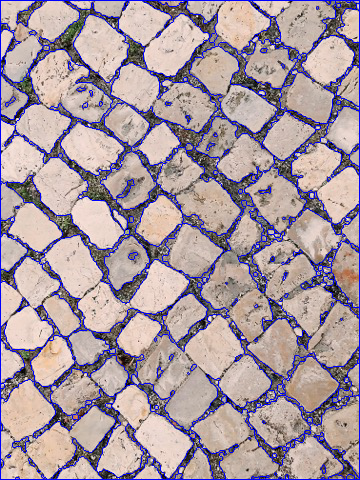

107


In [268]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.0007*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(opening)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img_markers = img.copy()
img_markers[markers == -1] = [255,0,0]
cv2_imshow(img_markers)
print(ret)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count8.jpg


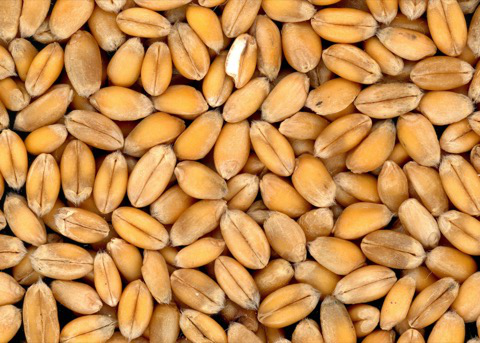

In [269]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count8.jpg"
img = url_to_image(url)
cv2_imshow(img)

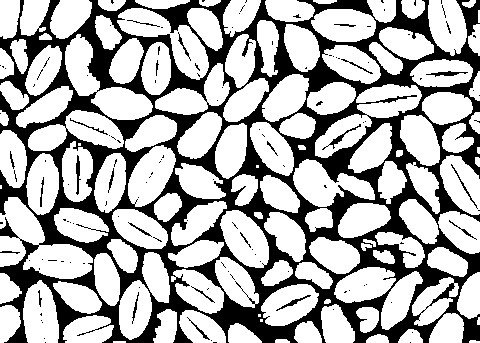

In [270]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, 
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY, 233, 10)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations = 1)
cv2_imshow(opening)

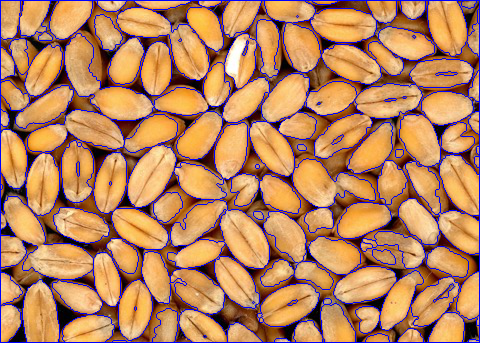

126


In [271]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.0007*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(opening)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img_markers = img.copy()
img_markers[markers == -1] = [255,0,0]
cv2_imshow(img_markers)
print(ret)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count9.jpg


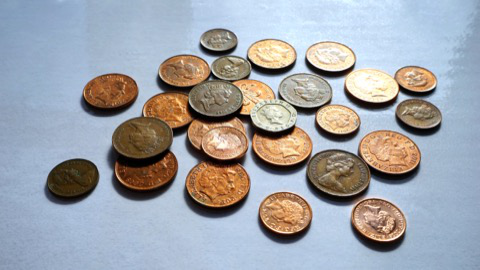

In [272]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count9.jpg"
img = url_to_image(url)
cv2_imshow(img)

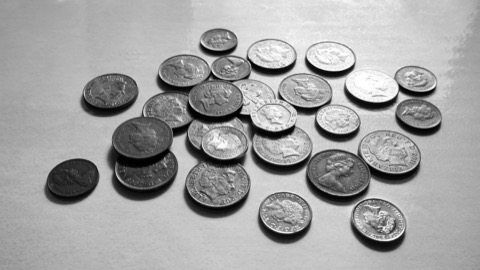

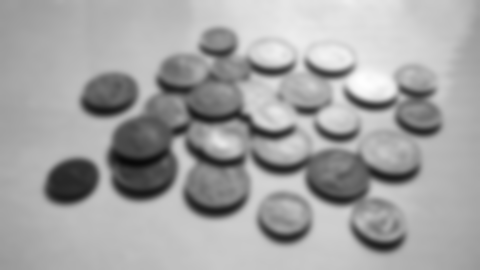

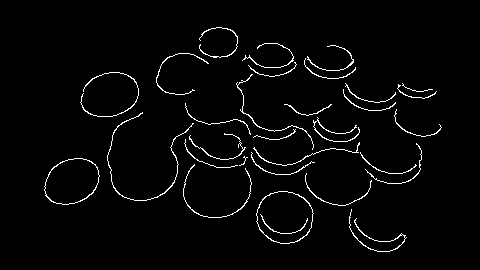

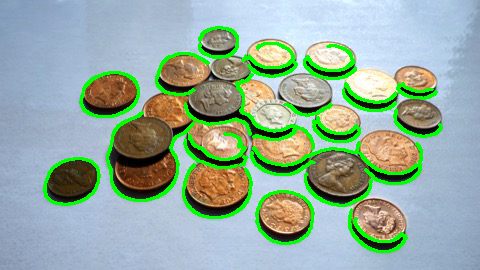

30


In [273]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (17, 17), 0)

cv2_imshow(gray)
cv2_imshow(blurred)

outline = cv2.Canny(blurred, 30, 180)


cv2_imshow(outline)

(im2, contours, hierarchy ) = cv2.findContours(outline, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
cv2_imshow(img)

print(len(contours))

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count10.jpg


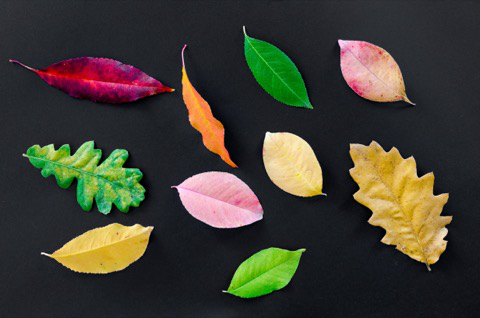

In [274]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count10.jpg"
img = url_to_image(url)
cv2_imshow(img)

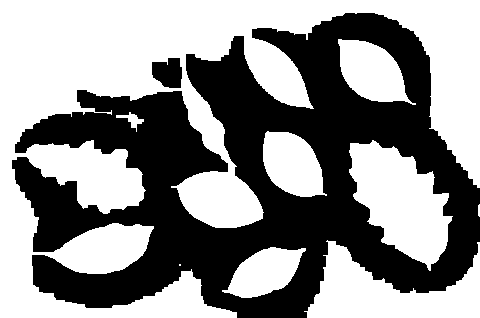

In [275]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, 
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY, 173, 9)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel, iterations = 4)
cv2_imshow(opening)

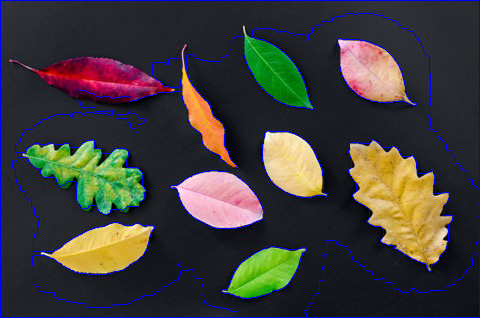

10


In [276]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.0007*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(opening)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img_markers = img.copy()
img_markers[markers == -1] = [255,0,0]
cv2_imshow(img_markers)
print(ret)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count11.jpg


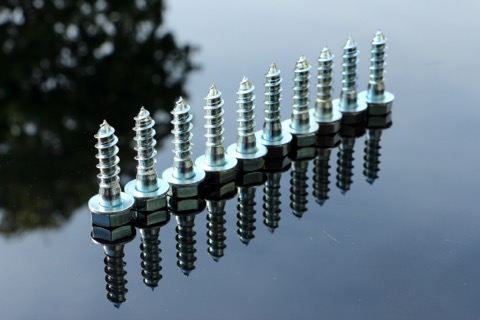

In [277]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count11.jpg"
img = url_to_image(url)
cv2_imshow(img)

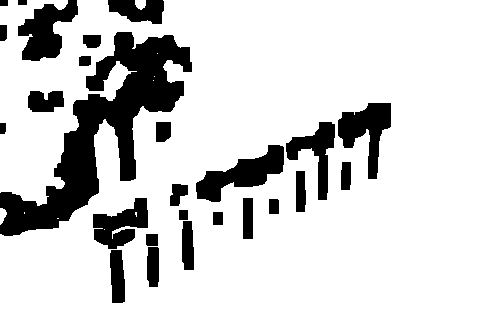

In [278]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, 
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY, 131, 9)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel, iterations = 4)
cv2_imshow(opening)

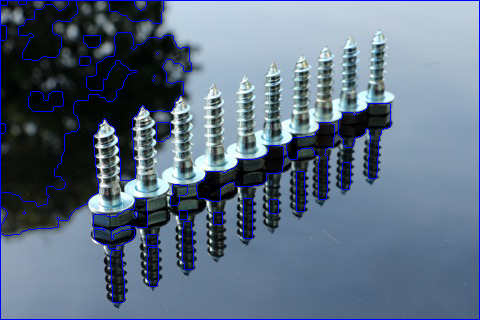

11


In [279]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.0007*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(opening)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img_markers = img.copy()
img_markers[markers == -1] = [255,0,0]
cv2_imshow(img_markers)
print(ret)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count12.jpg


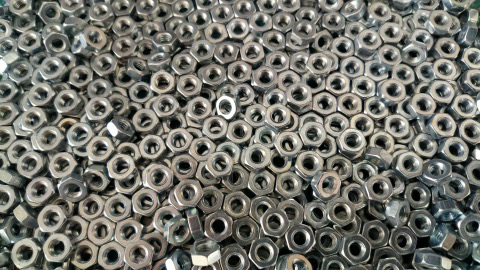

In [280]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/count/count12.jpg"
img = url_to_image(url)
cv2_imshow(img)

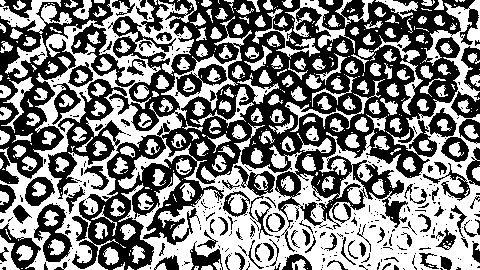

In [281]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2_imshow(thresh)

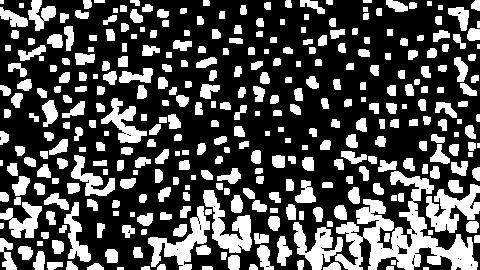

In [282]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
cv2_imshow(opening)

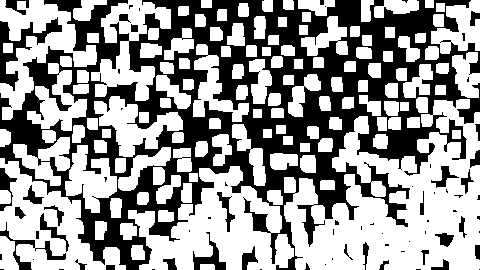

In [283]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=2)
cv2_imshow(sure_bg)

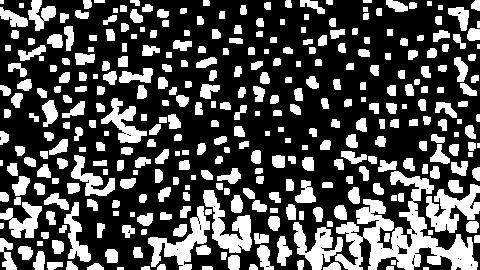

In [284]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.07*dist_transform.max(),255,0)
cv2_imshow(sure_fg)

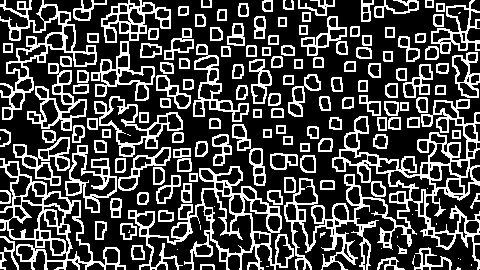

In [285]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
cv2_imshow(unknown)

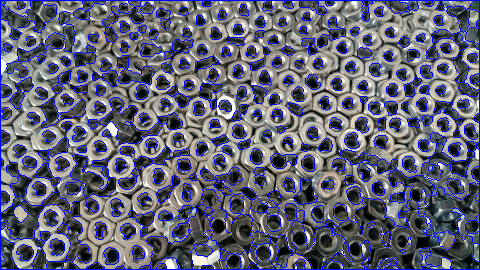

345


In [286]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img_mark = img.copy()
img_mark[markers == -1] = [255,0,0]
cv2_imshow(img_mark)
print(ret)